In [1]:
!pip install statsbombpy
!pip install mplsoccer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 999.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.4/79.4 kB 893.0 kB/s eta 0:00:00


In [2]:
import pandas as pd
from statsbombpy import sb
from mplsoccer import Sbopen

In [3]:
import numpy as np
import math

In [58]:
df_shot = pd.read_csv('/content/shot.csv')

In [6]:
#Calculate distance
def calculate_distance(x, y):
  p = np.array([x, y])
  g = np.array([120, 40])
  dist = np.array(g) - np.array(p)
  return np.linalg.norm(dist)

In [7]:
#Calculate angle
post_1 = [120, 36]
post_2 = [120, 44]

def calculate_angle(x, y):
  p = [x, y]
  v1 = np.array(post_1) - np.array(p)
  v2 = np.array(post_2) - np.array(p)
  angle = math.acos((v1 @ v2) / (np.linalg.norm(v1)*np.linalg.norm(v2)))
  return(abs(np.degrees(angle)))

In [59]:
df_shot['under_pressure'] = df_shot['under_pressure'].fillna(0).astype(int)
df_shot['under_pressure'] = df_shot['under_pressure'].astype(int)

In [60]:
df_shot['angle'] = df_shot.apply(lambda row:calculate_angle(row['x'], row['y']), axis=1)
df_shot['distance'] = df_shot.apply(lambda row:calculate_distance(row['x'], row['y']), axis=1)

In [61]:
df_shot['goal'] = df_shot.apply(lambda row:1 if row['outcome_name']=='Goal' else 0, axis=1)

In [11]:
df_shot['goal'].unique()

array([0, 1])

In [12]:
df_shot.head()

,Unnamed: 0,id,match_id,x,y,play_pattern_name,sub_type_name,under_pressure,body_part_name,outcome_name,angle,distance,goal
0,0,a2b83c3a-8d2f-4637-a217-b36d8a64b99e,69243,96.8,55.8,Regular Play,Open Play,1,Right Foot,Off T,13.520212,28.069200,0
1,1,c79cd4f3-386d-45c2-b56b-deca69a2d6c0,69243,91.8,40.1,From Counter,Open Play,1,Right Foot,Saved,16.146213,28.200177,0
2,2,99f67af2-ac68-4493-ab9f-c77087d5fa4c,69243,86.6,25.9,Regular Play,Open Play,0,Right Foot,Off T,11.628915,36.254241,0
3,3,049c9539-d04d-40d8-81a9-21a073d3c6ec,69243,112.2,32.5,From Throw In,Open Play,1,Head,Blocked,31.685861,10.820813,0
4,4,717d4a26-b525-451f-9072-bf84110c4644,69243,110.3,51.7,From Throw In,Open Play,1,Right Foot,Off T,19.847748,15.198026,0


In [13]:
df_shot['play_pattern_name'].unique()

array(['Regular Play', 'From Counter', 'From Throw In', 'From Corner',
       'From Free Kick', 'From Keeper', 'From Goal Kick', 'From Kick Off',
       'Other'], dtype=object)

In [14]:
df_shot['outcome_name'].unique()

array(['Off T', 'Saved', 'Blocked', 'Wayward', 'Goal', 'Post',
       'Saved Off Target', 'Saved to Post'], dtype=object)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [16]:
X_cols = ['angle', 'distance', 'under_pressure']
X = df_shot[X_cols]
y = df_shot['goal']

In [17]:
model = LogisticRegression(random_state=0).fit(X, y)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

**Logistic Regression**

In [19]:
model = LogisticRegression(fit_intercept=False)
model.fit(X_train, y_train)

LogisticRegression(fit_intercept=False)

In [20]:
y_pred = model.predict(X_test)
y_true = y_test

In [21]:
lr_accuracy = accuracy_score(y_true, y_pred)
lr_accuracy

0.8831908831908832

In [22]:
precision_score_LR = precision_score(y_true, y_pred, average='macro')
precision_score_LR

0.8258272738991563

In [23]:
recall_score_LR = recall_score(y_true, y_pred, average='macro')
recall_score_LR

0.5264799792336712

In [24]:
f1_score_LR = f1_score(y_true, y_pred)
f1_score_LR

0.10312500000000001

**Naive-Bayes**

In [25]:
N_Bay = GaussianNB()
N_Bay.fit(X_train,y_train)

GaussianNB()

In [26]:
y_predict_NB = N_Bay.predict(X_test)
y_true_NB = y_test

In [27]:
nb_accuracy = accuracy_score(y_true_NB, y_predict_NB)
nb_accuracy

0.8593813593813594

In [28]:
precision_score_NB = precision_score(y_true_NB, y_predict_NB, average='macro')
precision_score_NB

0.6464685674664874

In [29]:
recall_score_NB = recall_score(y_true_NB, y_predict_NB, average='macro')
recall_score_NB

0.6081932711973115

In [30]:
f1_score_NB = f1_score(y_true_NB, y_predict_NB)
f1_score_NB

0.3232125367286974

In [31]:
tree_classifier = DecisionTreeClassifier(random_state=0)
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [32]:
y_predict_tree = tree_classifier.predict(X_test)
y_true_tree = y_test
tree_accuracy = accuracy_score(y_true_tree, y_predict_tree)
precision_score_tree = precision_score(y_true_tree, y_predict_tree, average='macro')
recall_score_tree = recall_score(y_true_tree, y_predict_tree, average='macro')
f1_score_tree = f1_score(y_true_tree, y_predict_tree)

In [33]:
r_forest = RandomForestClassifier(random_state=0)
r_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [34]:
forest_predict = r_forest.predict(X_test)
forest_true = y_test
forest_accuracy = accuracy_score(forest_true, forest_predict)
precision_score_forest = precision_score(forest_true, forest_predict, average='macro')
recall_score_forest = recall_score(forest_true, forest_predict, average='macro')
f1_score_forest = f1_score(forest_true, forest_predict)

In [35]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive-Bayes', 'Decision Tree', 'Random Forest'],
    'Accuracy': [lr_accuracy, nb_accuracy, tree_accuracy, forest_accuracy],
    'Precision': [precision_score_LR, precision_score_NB, precision_score_tree, precision_score_forest],
    'Recall': [recall_score_LR, recall_score_NB, recall_score_tree, recall_score_forest],
    'F1-Score': [f1_score_LR, f1_score_NB, f1_score_tree, f1_score_forest]
})

In [36]:
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.883191,0.825827,0.526480,0.103125
3,Random Forest,0.862434,0.629575,0.568072,0.240449
1,Naive-Bayes,0.859381,0.646469,0.608193,0.323213
2,Decision Tree,0.830281,0.581814,0.571423,0.247292


In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

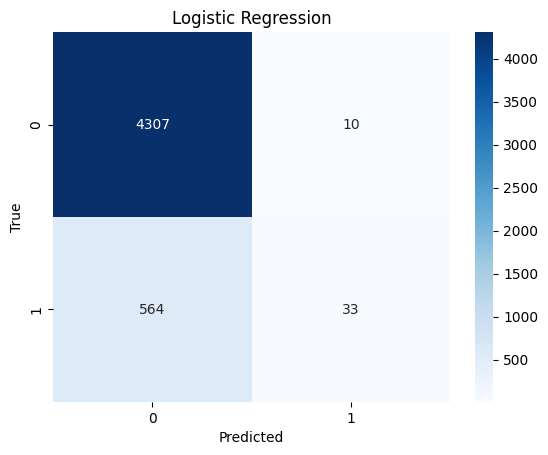

In [38]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Logistic Regression')
plt.show()

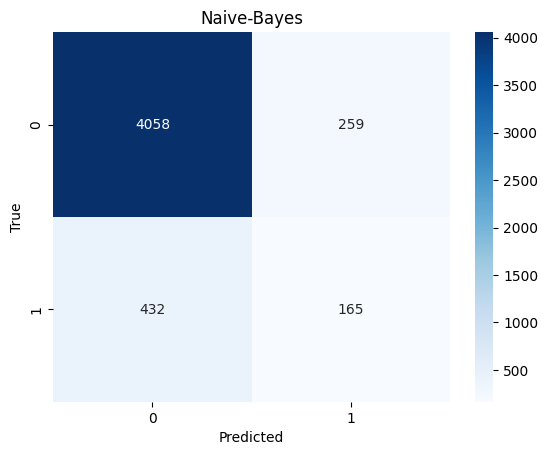

In [39]:
fig,ax = plt.subplots()
sns.heatmap(confusion_matrix(y_true_NB, y_predict_NB), annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Naive-Bayes')
plt.show()

Text(0.5, 1.0, 'Random Forest')

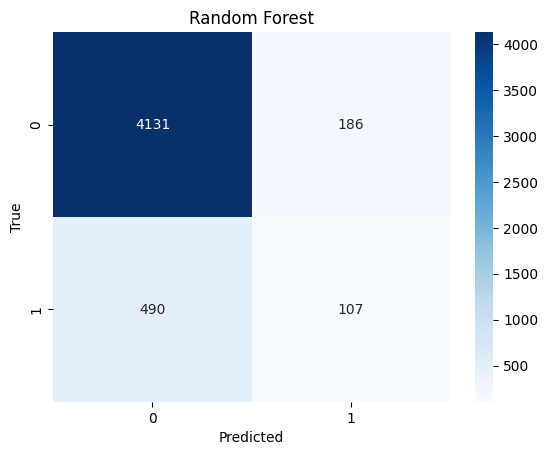

In [40]:
fig, ax= plt.subplots()
sns.heatmap(confusion_matrix(forest_true, forest_predict), annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Random Forest')

Text(0.5, 1.0, 'Decision Tree')

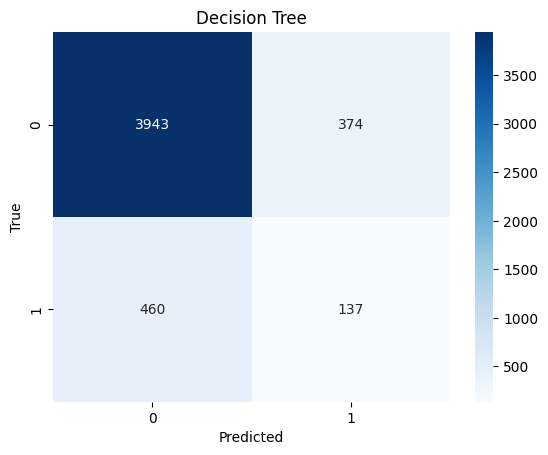

In [41]:
fig, ax= plt.subplots()
sns.heatmap(confusion_matrix(y_true_tree, y_predict_tree), annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Decision Tree')

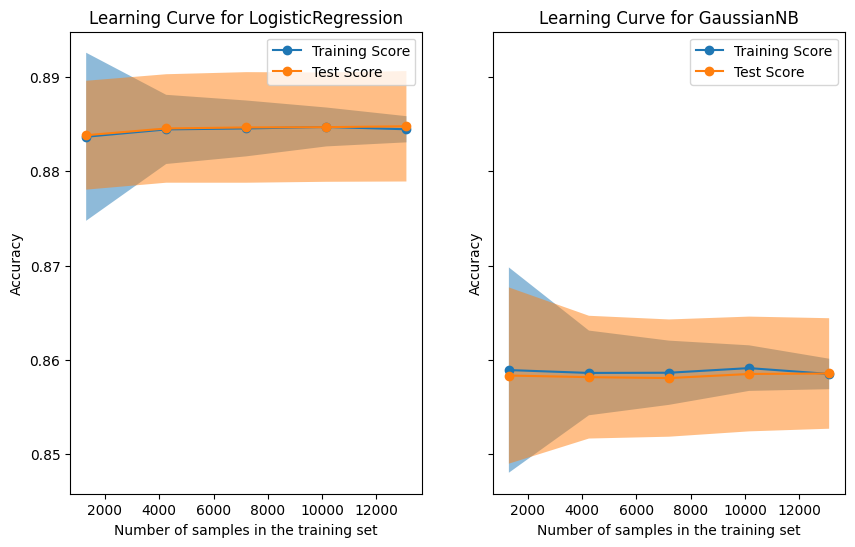

In [42]:
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([model, N_Bay]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

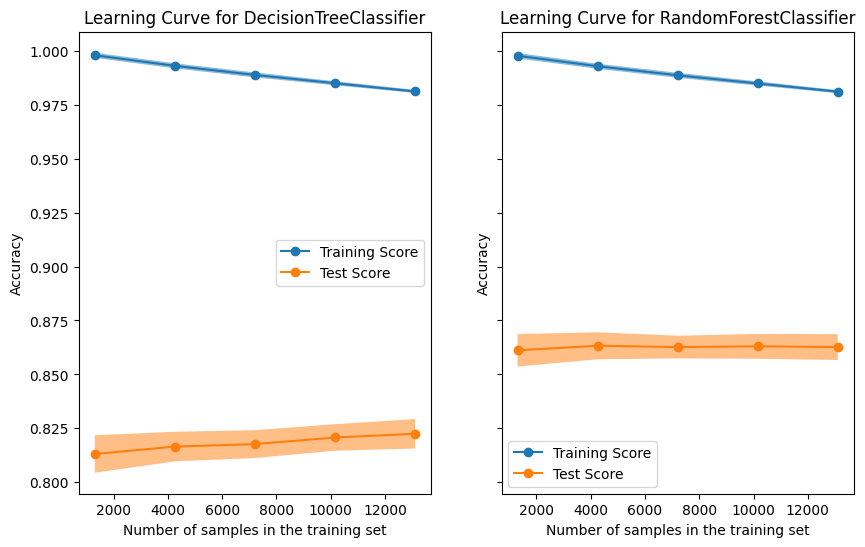

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([tree_classifier, r_forest]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

In [45]:
def X_G(row):
  under_pressure = 0 if np.isnan(row['under_pressure']) else 1
  angle = calculate_angle(row['x'], row['y'])
  distance = calculate_distance(row['x'], row['y'])
  X = [[angle, distance, under_pressure]]
  xg = model.predict_proba(X)[:, 1][0]
  return xg

In [62]:
df_shot['xg'] = df_shot.apply(X_G, axis=1)

In [47]:
df_shot.head()

,Unnamed: 0,id,match_id,x,y,play_pattern_name,sub_type_name,under_pressure,body_part_name,outcome_name,angle,distance,goal,xg
0,0,a2b83c3a-8d2f-4637-a217-b36d8a64b99e,69243,96.8,55.8,Regular Play,Open Play,1,Right Foot,Off T,13.520212,28.069200,0,0.011768
1,1,c79cd4f3-386d-45c2-b56b-deca69a2d6c0,69243,91.8,40.1,From Counter,Open Play,1,Right Foot,Saved,16.146213,28.200177,0,0.011812
2,2,99f67af2-ac68-4493-ab9f-c77087d5fa4c,69243,86.6,25.9,Regular Play,Open Play,0,Right Foot,Off T,11.628915,36.254241,0,0.003820
3,3,049c9539-d04d-40d8-81a9-21a073d3c6ec,69243,112.2,32.5,From Throw In,Open Play,1,Head,Blocked,31.685861,10.820813,0,0.127208
4,4,717d4a26-b525-451f-9072-bf84110c4644,69243,110.3,51.7,From Throw In,Open Play,1,Right Foot,Off T,19.847748,15.198026,0,0.067792


In [63]:
df_shot['actual_goals'] = df_shot.groupby('match_id')['goal'].sum()
df_shot['total_xg'] = df_shot.groupby('match_id')['xg'].sum()

In [49]:
df_shot

,Unnamed: 0,id,match_id,x,y,play_pattern_name,sub_type_name,under_pressure,body_part_name,outcome_name,angle,distance,goal,xg,actual_goals,total_xg
0,0,a2b83c3a-8d2f-4637-a217-b36d8a64b99e,69243,96.8,55.8,Regular Play,Open Play,1,Right Foot,Off T,13.520212,28.069200,0,0.011768,NaN,NaN
1,1,c79cd4f3-386d-45c2-b56b-deca69a2d6c0,69243,91.8,40.1,From Counter,Open Play,1,Right Foot,Saved,16.146213,28.200177,0,0.011812,NaN,NaN
2,2,99f67af2-ac68-4493-ab9f-c77087d5fa4c,69243,86.6,25.9,Regular Play,Open Play,0,Right Foot,Off T,11.628915,36.254241,0,0.003820,NaN,NaN
3,3,049c9539-d04d-40d8-81a9-21a073d3c6ec,69243,112.2,32.5,From Throw In,Open Play,1,Head,Blocked,31.685861,10.820813,0,0.127208,NaN,NaN
4,4,717d4a26-b525-451f-9072-bf84110c4644,69243,110.3,51.7,From Throw In,Open Play,1,Right Foot,Off T,19.847748,15.198026,0,0.067792,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16373,16373,2f9f5734-2d09-4992-95a6-59301a088be6,303473,94.0,45.3,Regular Play,Open Play,0,Right Foot,Blocked,16.819334,26.534694,0,0.014864,NaN,NaN
16374,16374,dbe29b1d-218b-4f7f-8a25-efab55306de1,303473,113.1,36.4,From Throw In,Open Play,0,Right Foot,Off T,51.081639,7.782673,0,0.205684,NaN,NaN
16375,16375,88a269d0-f6b7-4fd9-bb37-5fc0a25659a5,303473,96.8,29.5,Regular Play,Open Play,0,Left Foot,Off T,16.353977,25.465467,0,0.017095,NaN,NaN
16376,16376,fd655610-d3bb-4218-9214-d9bca81bcc7c,303473,91.7,48.2,From Keeper,Open Play,0,Left Foot,Saved,14.879009,29.464046,0,0.009856,NaN,NaN


In [53]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [64]:
df_shot = df_shot[['actual_goals', 'total_xg']]
df_shot.dropna(inplace=True)

<ipython-input-64-99e08ec39bfa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shot.dropna(inplace=True)


In [65]:
df_shot

,actual_goals,total_xg
9575,1.0,0.986853
9581,2.0,1.662746
9592,5.0,3.002494
9602,3.0,1.035332
9609,6.0,1.565348
9620,1.0,1.919026
9636,3.0,2.273689
9642,2.0,0.964306
9650,2.0,1.748909
9661,2.0,2.393418
